In [1]:
from astropy.io import ascii
import math
import numpy as np
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import astropy.io.fits as fits
import matplotlib as mpl
import matplotlib.pyplot as plt

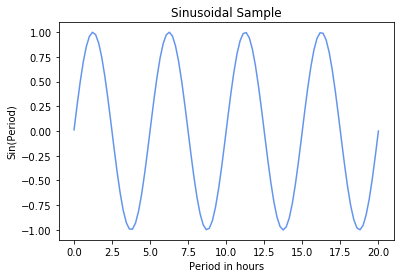

In [14]:
t = np.linspace(0.01,20,100)
period_samp = 5
x = (2*np.pi)*(t/period_samp)
# Change into anular frequencies
len(x)
sine_funct = np.sin(x)
plt.title('Sinusoidal Sample');plt.xlabel('Period in hours')
plt.ylabel('Sin(Period)')
plt.plot(t,sine_funct,'-',color='cornflowerblue')
u=25
# plt.plot([x[u-1],x[u],x[u+1]],[sine_funct[u-1],sine_funct[u],sine_funct[u+1]],'.',color='r')
# plt.axvline(x=6.321585682089714 , color='r', linestyle='--')
# print(sine_funct[u],x[u])

(0, 20)

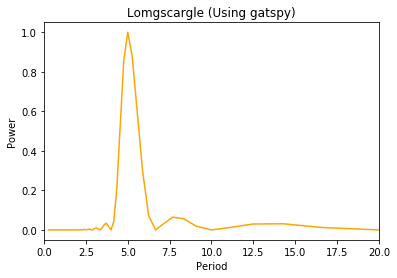

In [15]:
from gatspy.periodic import LombScargleFast
# plt.plot(x,sine_funct)
model = LombScargleFast().fit(t, sine_funct)
period_gatspy, power_gatspy = model.periodogram_auto(nyquist_factor=1.5)
plt.plot(period_gatspy,power_gatspy,color='orange')
plt.title('Lomgscargle (Using gatspy)')
plt.xlabel('Period');plt.ylabel('Power')
plt.xlim(0,20)

# maxvalue=np.amax(power_gatspy)
# for i in range(len(power_gatspy)):
#         if maxvalue == power_gatspy[i]:
# #             print('Max Pwr:',maxvalue)
#             print('period at index:',period_gatspy[i],'\n')
#             g_peak_period=period_gatspy[i]
# plt.axvline(x=g_peak_period, color='r', linestyle='--')
# print("period range: ({0}, {1})".format(period.min(), period.max()))
# print("number of periods: {0}".format(len(period)))

period at index: 5.125641025641024 



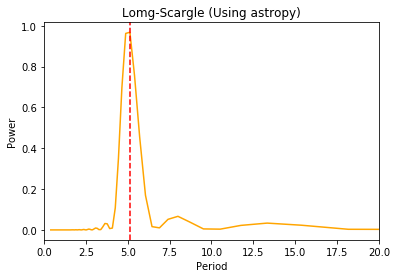

In [4]:
from astropy.timeseries import LombScargle
import astropy
frequency, power_astropy = LombScargle(t, sine_funct).autopower(nyquist_factor=1.0)
# plt.plot(period_samp,sine_funct)
plt.plot(1/frequency,power_astropy,color='orange')
plt.title('Lomg-Scargle (Using astropy)')
plt.xlabel('Period');plt.ylabel('Power')
plt.xlim(0,20)

# Finding the peak power value than using that peak value
# to find the correlated period value
maxvalue=np.amax(power_astropy)
for i in range(len(power_astropy)):
        if maxvalue == power_astropy[i]:
#             print('Max Pwr:',maxvalue)
            print('period at index:',1/frequency[i],'\n')
            a_peak_per iod=1/frequency[i]
plt.axvline(x=a_peak_period, color='r', linestyle='--')

# minimum_frequency=0.1,maximum_frequency=1.9

100 100 100


Text(0,0.5,'Power')

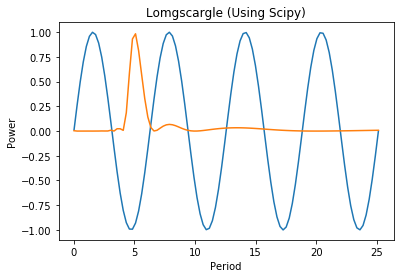

In [11]:
import matplotlib.pyplot as plt
import scipy.signal as signal
test_f = (2*np.pi)/x
print(len(test_f),len(x),len(sine_funct))
powers = signal.lombscargle(t, sine_funct, test_f, normalize=True)
plt.plot(x, sine_funct)
plt.plot(x, powers)
plt.title('Lomgscargle (Using Scipy)')
plt.xlabel('Period');plt.ylabel('Power')
# plt.xlim(0,20)

In [6]:
def xvaluefinder(t,y,i_a,i_b,isit_freq):
#     NOTE
#     You would need to know whether 1) your period 't' is in
#     frequency or not. 2) you would also need to know what your 
#     a and b index values are... The a and b can be two values from
#     the x axis so you can set it between the curve of the graph
#     to find the maximum value from the y axis. It is recomended 
#     to give two points where the graph has only one curve. it is fine
#     if there are multiple as long there is one maximum point in the y 
#     axis that is largest
    full_t=t;full_y=y;
    sliced_t=t[i_a:i_b];sliced_y=y[i_a:i_b];
    if isit_freq=='yes':
        full_t=1/full_t
    elif isit_freq == 'no':
        full_t=full_t
#     find max power value of sliced value
    maxvalue=np.amax(sliced_y)
#     find the index that's correlated to the max power from data
#     using the full data of t and y.
    for i in range(len(full_y)):
    # #     print(pwr[i])
        if maxvalue == full_y[i]:
            print('Max Pwr:',maxvalue)
#             print('index:',i)
            print('period at index:',full_t[i],'\n')
            result=full_t[i]
    return(result)

100 100
30 30


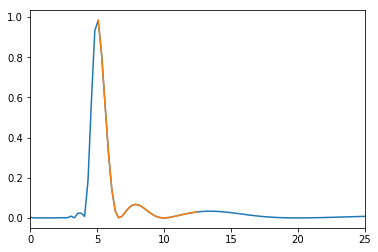

251 251
21 21


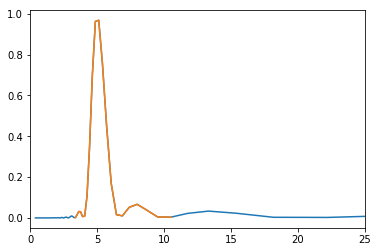

375 251
21 21


(0, 25)

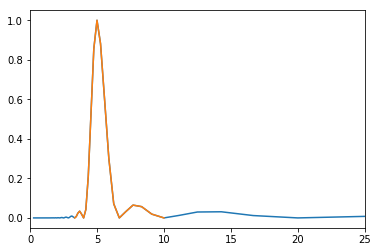

In [17]:
# to determine a and b below
# # ---period, powers
ps =x
a=20
b=50
print(len(powers),len(ps))
print(len(powers[a:b]),len(ps[a:b]))
sl_pwrs = powers[a:b]
sl_ps =ps[a:b]
plt.plot(ps,powers)
plt.plot(sl_ps,sl_pwrs)
plt.xlim(0,25);plt.show()

# # ---frequency, power_astropy
period_astropy =1/frequency
a=9
b=30
print(len(power_astropy),len(period_astropy))
print(len(power_astropy[a:b]),len(period_astropy[a:b]))
sl_pwra = power_astropy[a:b]
sl_period_astropy =period_astropy[a:b]
plt.plot(period_astropy,power_astropy)
plt.plot(sl_period_astropy,sl_pwra)
plt.xlim(0,25);plt.show()

# ---period, power_gatspy
pg =period_gatspy
a=9
b=30
print(len(power_gatspy),len(period_astropy))
print(len(power_gatspy[a:b]),len(period_gatspy[a:b]))
sl_pwrg = power_gatspy[a:b]
sl_pg =period_gatspy[a:b]
plt.plot(period_gatspy,power_gatspy)
plt.plot(sl_pg,sl_pwrg)
plt.xlim(0,25)

In [8]:
t_1=xvaluefinder(x,powers,20,50,'no')
t_2=xvaluefinder(frequency,power_astropy,6,100,'yes')
t_3=xvaluefinder(period_gatspy,power_gatspy,6,100,'no')
print('period:',np.average([t_2,t_3,t_1]))

Max Pwr: 0.9841551541178754
period at index: 5.087349170231326 

Max Pwr: 0.9683853726051587
period at index: 5.125641025641024 

Max Pwr: 0.9999865951407935
period at index: 4.997499999999999 

period: 5.070163398624116


In [9]:
# from gatspy import datasets, periodic
# model = periodic.LombScargleFast(fit_period=True);
# model.optimizer.set(period_range=(0.5, 10), first_period_astropyss_coverage=2);
# model.fit(x, sine_funct);
# model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.25
 - Using 5 steps per peak; omega_step = 0.05
 - User-specified period range:  0.5 to 10
 - Computing periods at 240 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


6.276877836533793

In [124]:
# val =(a_peak_period+g_peak_period)/2
# val

In [11]:
# import numpy as np
# rand = np.random.RandomState(42)
# t = np.linsperiod_astropyce(0,10,100)
# y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
# frequency, power = LombScargle(t, y).autopower()
# plt.plot(frequency, power)
# plt.plot(t,y)
# plt.xlim(0,18)